In [4]:
# Includes 5 tables of which 4 are domains and 1 is performance
# Instead of creation 4 data frames we use dictionary of dataframes using comprehensions
# See below an example of comprehensions from https://towardsdatascience.com/dictionary-comprehensions-in-python-912a453da512

num_list = [1,1,7,3,5,3,2,9,5,1,3,2,2,2,2,2,9]
count_dict = {}
for num in num_list:
    count_dict[num] = num_list.count(num) # Create a key value pair
print(count_dict)
# {1: 3, 7: 1, 3: 3, 5: 2, 2: 6, 9: 2}


{1: 3, 7: 1, 3: 3, 5: 2, 2: 6, 9: 2}


# Ok now back to healthcare dataset with HVBP 

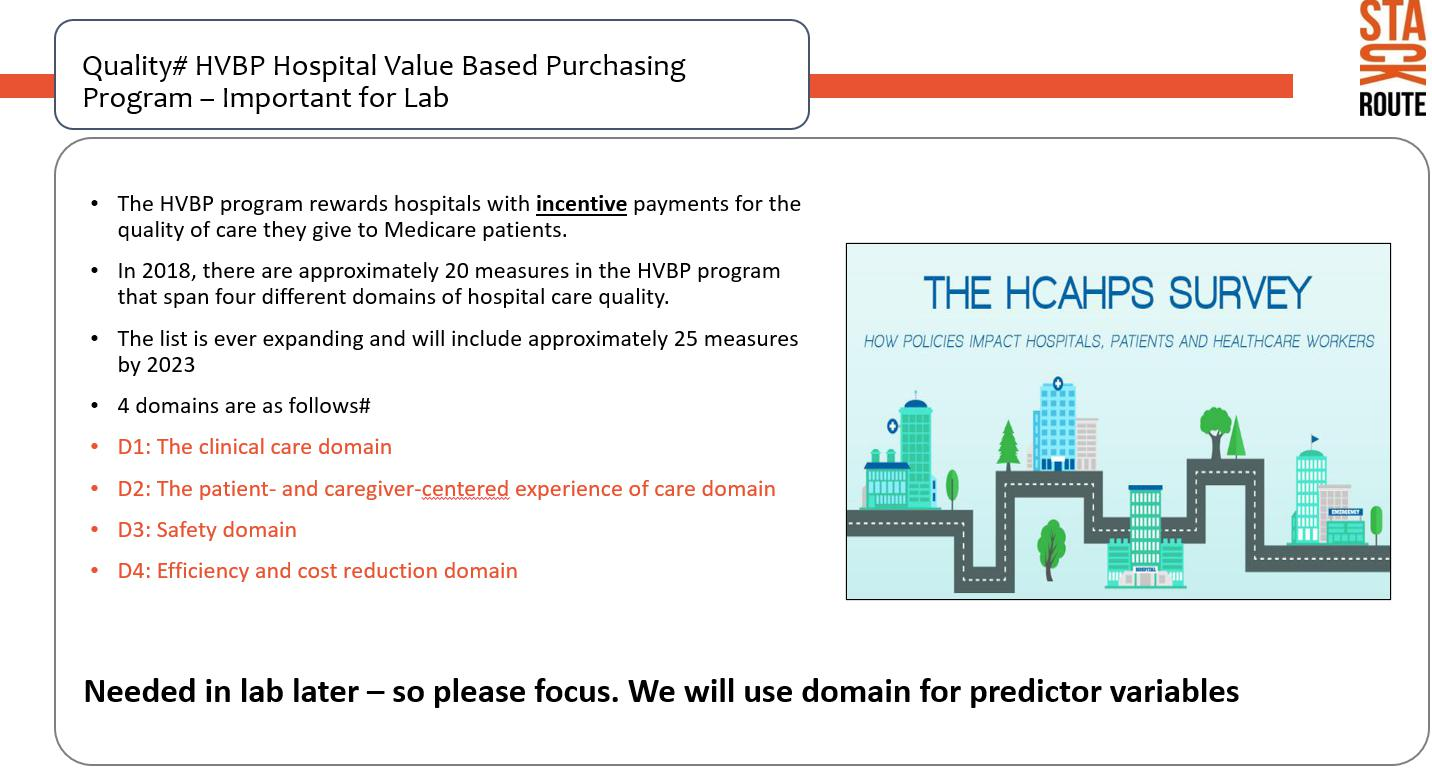

In [1]:
import pandas as pd
# df = pd.read_csv('./Datasets/Input2/ESRD_QIP_-_Complete_QIP_Data_-_Payment_Year_2018.csv',header=0)
#D:\\Stackroute\\Phillips\\Delivery Phillips\\Track 3B_Unit_F_ML in Healthcare\\Track 3B_Unit_F_Notebooks\\Datasets\\Input2
pathname = 'D:\\Stackroute\\Phillips\\Delivery Phillips\\Track 3B_Unit_F_ML in Healthcare\\Track 3B_Unit_F_Notebooks\\Datasets\\Input2\\'

files_of_interest = [
    'hvbp_tps_11_07_2017.csv', 
    'hvbp_clinical_care_11_07_2017.csv',
    'hvbp_safety_11_07_2017.csv',
    'hvbp_efficiency_11_07_2017.csv',
    'hvbp_hcahps_11_07_2017.csv'
]

dfs = {
    foi: pd.read_csv(pathname + foi, header=0) for foi in files_of_interest
}


In [2]:
#Let us now see the dataframe

In [3]:
dfs

{'hvbp_tps_11_07_2017.csv':       Provider Number                                      Hospital Name  \
 0               10001                   SOUTHEAST ALABAMA MEDICAL CENTER   
 1               10005                      MARSHALL MEDICAL CENTER SOUTH   
 2               10006                     ELIZA COFFEE MEMORIAL HOSPITAL   
 3               10007                           MIZELL MEMORIAL HOSPITAL   
 4               10011                                  ST VINCENT'S EAST   
 ...               ...                                                ...   
 2803           670096              BAY AREA REGIONAL MEDICAL CENTER, LLC   
 2804           670098                           RESOLUTE HEALTH HOSPITAL   
 2805           670103                              MEDICAL CITY ALLIANCE   
 2806           670106                            PEARLAND MEDICAL CENTER   
 2807           670108  BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...   
 
                          Address           Cit

In [9]:

# This is the combined dictionary of dataframes - Uncomment to run the cell above.
# Note all 5 files from Hvbp

In [12]:
#Demo of items() function used below - it returns list of tuple pairs
# Recall: A tuple is a sequence of immutable Python objects. Tuples are sequences, just like lists. 
#The differences between tuples and lists are, the tuples cannot be changed unlike lists and tuples use parentheses,
# whereas lists use square brackets.
dict = {'Name': 'Zara', 'Age': 7}
print ("Value : %s" %  dict.items())

Value : dict_items([('Name', 'Zara'), ('Age', 7)])


In [13]:
for k, v in dfs.items():
    print(
        k + ' -  Number of rows: ' + str(v.shape[0]) + 
        ', Number of columns: ' + str(v.shape[1]) 
    )

hvbp_tps_11_07_2017.csv -  Number of rows: 2808, Number of columns: 16
hvbp_clinical_care_11_07_2017.csv -  Number of rows: 2808, Number of columns: 28
hvbp_safety_11_07_2017.csv -  Number of rows: 2808, Number of columns: 64
hvbp_efficiency_11_07_2017.csv -  Number of rows: 2808, Number of columns: 14
hvbp_hcahps_11_07_2017.csv -  Number of rows: 2808, Number of columns: 73


In [14]:
for v in dfs.values(): # We loop to find the common column ID just like SQL JOIN
    for column in v.columns:
        print(column)
    print('\n')
        

Provider Number
Hospital Name
Address
City
State
Zip Code
County Name
Unweighted Normalized Clinical Care Domain Score
Weighted Normalized Clinical Care Domain Score
Unweighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score
Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score
Unweighted Normalized Safety Domain Score
Weighted Safety Domain Score
Unweighted Normalized Efficiency and Cost Reduction Domain Score
Weighted Efficiency and Cost Reduction Domain Score
Total Performance Score


Provider Number
Hospital Name
Address
City
State
ZIP Code
County Name
MORT-30-AMI Achievement Threshold
MORT-30-AMI Benchmark
MORT-30-AMI Baseline Rate
MORT-30-AMI Performance Rate
MORT-30-AMI Achievement Points
MORT-30-AMI Improvement Points
MORT-30-AMI Measure Score
MORT-30-HF Achievement Threshold
MORT-30-HF Benchmark
MORT-30-HF Baseline Rate
MORT-30-HF Performance Rate
MORT-30-HF Achievement Points
MORT-30-HF Improvement Points
MO

# Observation: Looking at the 5 tables above carefully we can see that 'Provider Number' is common to all tables

In [15]:
df_master = dfs[files_of_interest[0]].merge(
    dfs[files_of_interest[1]], 
    on='Provider Number', 
    how='left',
    copy=False
)

print(df_master.shape)

(2808, 43)


In [16]:
# See initial output of cell 3
#hvbp_tps_11_07_2017.csv -  Number of rows: 2808, Number of columns: 16
#hvbp_clinical_care_11_07_2017.csv -  Number of rows: 2808, Number of columns: 28

# If the merge is a success we should have 16+ 28 Minus 1 rows = 44 -1 = 43 rows

# Observation: The merge of tps & clinical care table is now correct

In [17]:
print(df_master.columns) # Columns of the newly joined data frames

Index(['Provider Number', 'Hospital Name_x', 'Address_x', 'City_x', 'State_x',
       'Zip Code', 'County Name_x',
       'Unweighted Normalized Clinical Care Domain Score',
       'Weighted Normalized Clinical Care Domain Score',
       'Unweighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score',
       'Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score',
       'Unweighted Normalized Safety Domain Score',
       'Weighted Safety Domain Score',
       'Unweighted Normalized Efficiency and Cost Reduction Domain Score',
       'Weighted Efficiency and Cost Reduction Domain Score',
       'Total Performance Score', 'Hospital Name_y', 'Address_y', 'City_y',
       'State_y', 'ZIP Code', 'County Name_y',
       'MORT-30-AMI Achievement Threshold', 'MORT-30-AMI Benchmark',
       'MORT-30-AMI Baseline Rate', 'MORT-30-AMI Performance Rate',
       'MORT-30-AMI Achievement Points', 'MORT-30-AMI Improvement Points',
    

# Now Let us join the remaining 3 tables + rename Provider_Number to Provider Number for a clean JOIN

In [18]:
for df in dfs.values():
    df.columns = [col if col not in ['Provider_Number'] else 'Provider Number' for col in df.columns]

for num in [2,3,4]:
    df_master = df_master.merge(
        dfs[files_of_interest[num]],
        on='Provider Number',
        how='left',
        copy=False
    )
        
print(df_master.shape)

(2808, 191)


# Observation: We can again check that sum of 5 tables minus 4 rows matches

In [19]:
for column in df_master.columns:
    print(column)

Provider Number
Hospital Name_x
Address_x
City_x
State_x
Zip Code
County Name_x
Unweighted Normalized Clinical Care Domain Score
Weighted Normalized Clinical Care Domain Score
Unweighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score
Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score
Unweighted Normalized Safety Domain Score
Weighted Safety Domain Score
Unweighted Normalized Efficiency and Cost Reduction Domain Score
Weighted Efficiency and Cost Reduction Domain Score
Total Performance Score
Hospital Name_y
Address_y
City_y
State_y
ZIP Code_x
County Name_y
MORT-30-AMI Achievement Threshold
MORT-30-AMI Benchmark
MORT-30-AMI Baseline Rate
MORT-30-AMI Performance Rate
MORT-30-AMI Achievement Points
MORT-30-AMI Improvement Points
MORT-30-AMI Measure Score
MORT-30-HF Achievement Threshold
MORT-30-HF Benchmark
MORT-30-HF Baseline Rate
MORT-30-HF Performance Rate
MORT-30-HF Achievement Points
MORT-30-HF Improvement Point

# We can continue to do same kind of analysis now as we did for Dialysis center example. Some are shown

In [20]:
# Check for MSPB-1 Measure Score 
print(df_master.groupby('MSPB-1 Measure Score').size())

MSPB-1 Measure Score
0 out of 10      1175
1 out of 10       451
10 out of 10       57
2 out of 10       319
3 out of 10       239
4 out of 10       178
5 out of 10       127
6 out of 10       104
7 out of 10        78
8 out of 10        41
9 out of 10        38
Not Available       1
dtype: int64


In [21]:
#Weighted Normalized Clinical Care Domain Score
print(df_master.groupby('Weighted Normalized Clinical Care Domain Score').size())

Weighted Normalized Clinical Care Domain Score
0.000000000000      80
0.833333333333      19
1.250000000000      28
1.666666666667      31
10.000000000000    163
10.833333333333    123
11.111111111111      2
11.250000000000     26
11.666666666667    138
12.222222222222      4
12.500000000000    149
13.333333333333    132
13.750000000000     10
14.166666666667     91
14.444444444444      1
15.000000000000    130
15.555555555556      2
15.833333333333     66
16.250000000000      6
16.666666666667    118
17.500000000000     61
17.777777777778      1
18.333333333333     53
18.750000000000      6
18.888888888889      2
19.166666666667     57
2.500000000000      58
20.000000000000     40
20.833333333333     44
21.111111111111      2
21.250000000000      1
21.666666666667     26
22.222222222222      1
22.500000000000     22
23.333333333333     22
24.166666666667     16
25.000000000000     35
26.666666666667      1
3.333333333333      50
3.750000000000      38
30.000000000000      2
31.1111111

In [22]:
print(df_master.groupby('Weighted Normalized Clinical Care Domain Score').size().sort_values(ascending=False))

Weighted Normalized Clinical Care Domain Score
10.000000000000    163
12.500000000000    149
8.333333333333     147
11.666666666667    138
13.333333333333    132
15.000000000000    130
5.000000000000     129
7.500000000000     128
10.833333333333    123
9.166666666667     120
16.666666666667    118
6.666666666667     114
Not Available       99
14.166666666667     91
5.833333333333      89
0.000000000000      80
15.833333333333     66
17.500000000000     61
2.500000000000      58
19.166666666667     57
18.333333333333     53
3.333333333333      50
4.166666666667      50
20.833333333333     44
20.000000000000     40
3.750000000000      38
6.250000000000      38
25.000000000000     35
8.750000000000      32
1.666666666667      31
1.250000000000      28
11.250000000000     26
21.666666666667     26
22.500000000000     22
23.333333333333     22
0.833333333333      19
24.166666666667     16
13.750000000000     10
16.250000000000      6
18.750000000000      6
12.222222222222      4
18.8888888

In [23]:
print(df_master.head(n=1))

   Provider Number                   Hospital Name_x               Address_x  \
0            10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

   City_x State_x  Zip Code County Name_x  \
0  DOTHAN      AL     36301       Houston   

  Unweighted Normalized Clinical Care Domain Score  \
0                                  43.333333333333   

  Weighted Normalized Clinical Care Domain Score  \
0                                10.833333333333   

  Unweighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score  \
0                                               26.0                                            

   ... Overall Rating of Hospital Floor  \
0  ...                            37.67   

  Overall Rating of Hospital Achievement Threshold  \
0                                            70.23   

  Overall Rating of Hospital Benchmark  \
0                                84.58   

  Overall Rating of Hospital Baseline Rate  \
0           

In [24]:
print(df_master.groupby('MSPB-1 Measure Score').size().sort_values(ascending=False))


MSPB-1 Measure Score
0 out of 10      1175
1 out of 10       451
2 out of 10       319
3 out of 10       239
4 out of 10       178
5 out of 10       127
6 out of 10       104
7 out of 10        78
10 out of 10       57
8 out of 10        41
9 out of 10        38
Not Available       1
dtype: int64
